In [106]:
import numpy as np 
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv('gold_price_data.csv')

In [108]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [109]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [110]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [111]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [112]:
# postive corelation 
# negative corelation


In [113]:
correlation = df.corr(numeric_only=True)

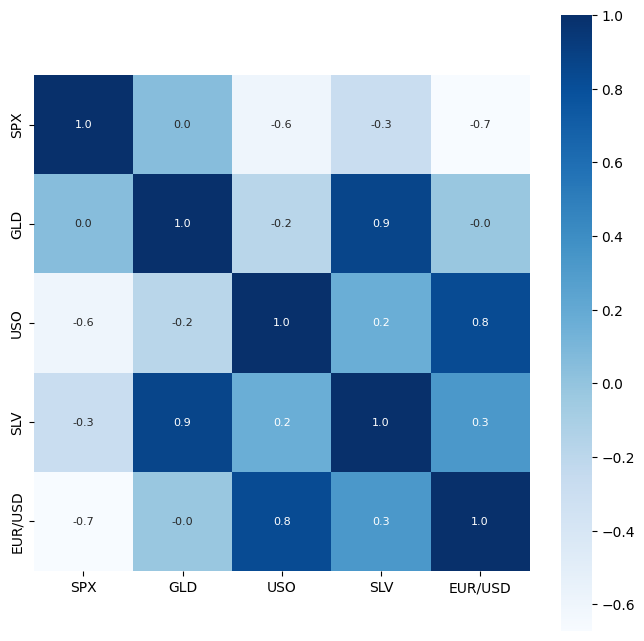

In [114]:
plt.figure(figsize=(8, 8))
sns.heatmap(corelation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap="Blues")
plt.show()

In [115]:
# Correlation of gold

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [116]:
# Checking the distribution 

<Axes: xlabel='GLD', ylabel='Count'>

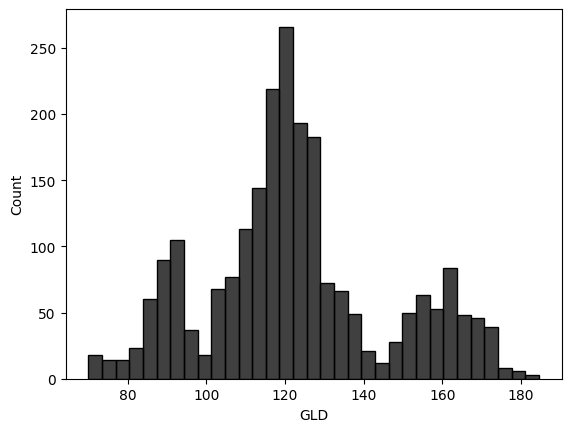

In [117]:
sns.histplot(df['GLD'], color='black') 

In [118]:
# spliting the features and target 

In [119]:
x = df.drop(['Date','GLD'], axis= 1)
y = df['GLD']

In [120]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [121]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [122]:
# splitting data into train and test 

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [123]:
# model training 
# random forest regression 

In [124]:
# Initialize and train the RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [125]:
# test data prediction

In [126]:
x_test_prediction = regressor.predict(x_test)

print(x_test_prediction)

[168.54429905  82.18330005 116.20249996 127.581401   120.7742014
 154.65609775 150.34849863 126.13570007 117.47459873 125.80970103
 116.73570079 171.51170041 141.20939897 167.90569838 115.22830002
 117.89870049 138.23630267 170.09280098 159.3845031  159.69939961
 155.07200019 125.52560061 176.37439936 157.29620304 125.29390058
  93.97389997  77.96270008 120.56280014 119.03749925 167.36400011
  88.06960089 125.37439995  91.10290088 117.59260009 121.11299866
 136.41690083 115.57620116 115.27830068 147.44209977 107.305201
 104.1291022   87.22289801 126.59920045 117.99460014 153.60129933
 119.77900005 108.47349966 108.01059767  93.13630024 127.15209818
  74.81110046 113.58459902 121.11109988 111.22839917 118.81529901
 120.50279928 159.58119973 167.21250078 147.05609632  85.98729861
  94.30980023  86.77049925  90.41780036 118.85670081 126.42190054
 127.47430028 170.42489956 122.2250991  117.37879892  98.66230025
 168.01210147 143.07389856 131.90280272 121.17540221 121.08189921
 119.63920053

In [127]:
# R square error

In [128]:
error_square = metrics.r2_score(y_test , x_test_prediction)

print('R Square error : ' , error_square)

R Square error :  0.9893676977313235


In [129]:
# comparing the actual values and predicting values in the plot

In [130]:
y_test = list(y_test)


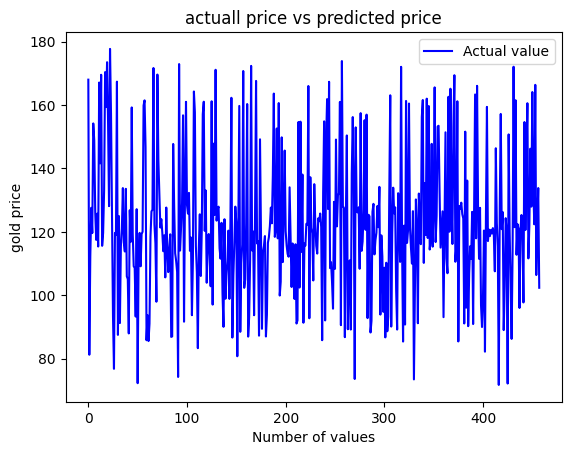

In [131]:
plt.plot(y_test , color='blue' , label ='Actual value')
plt.title('actuall price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('gold price')
plt.legend()
plt.show()

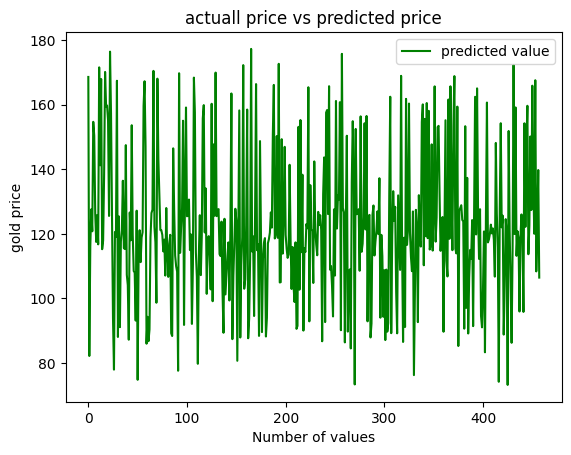

In [132]:
plt.plot(x_test_prediction , color = 'green',label=
         'predicted value')
plt.title('actuall price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('gold price')
plt.legend()
plt.show()